#Importing required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#Creating required function(Gaussian)

In [2]:
def _kernel(size=11):
   
    kernel = np.zeros((size, size), np.float32)
    for i in range(size):
        for j in range(size):
            if(i==j):
                kernel[i][j]=1
    
    return kernel / np.sum(kernel)

#Input Image

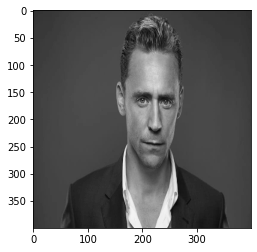

In [3]:
path = "../img/loki.jpg"
inp_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img= cv2.resize(inp_img, (400, 400))

plt.imshow(img, "gray")
plt.show()

#Generating Gaussian kernel

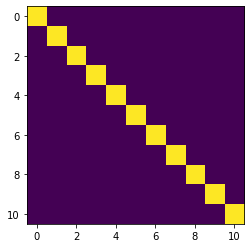

In [4]:
kernel = _kernel()
plt.imshow(kernel)
plt.show()

#Padding Gaussian Kernel According to image

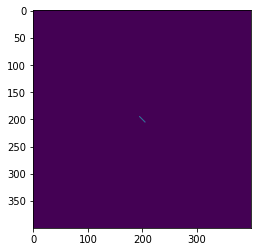

In [5]:

padding = int(img.shape[0]//2 - kernel.shape[0]//2)
padded_kernel = np.pad(kernel, (padding,padding-1), 'constant', constant_values=(0))
plt.imshow(padded_kernel)
plt.show()

#Transforming both kernel and image into fourier domain

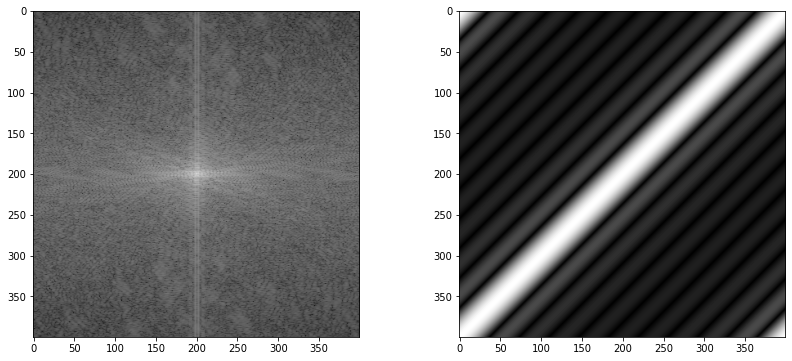

In [6]:
IMG = np.fft.fft2(img)
KERNEL = np.fft.fft2(padded_kernel)
IMG_SHIFT = np.fft.fftshift(np.log1p(np.abs(IMG)))
KERNEL_SHIFT = np.fft.fftshift(np.log1p(np.abs(KERNEL)))
figure, axis = plt.subplots(1,2, figsize=(14, 6))
axis[0].imshow(IMG_SHIFT, "gray")
axis[1].imshow(KERNEL_SHIFT, "gray")
plt.show()

#Blurring the image with gaussian kernel 

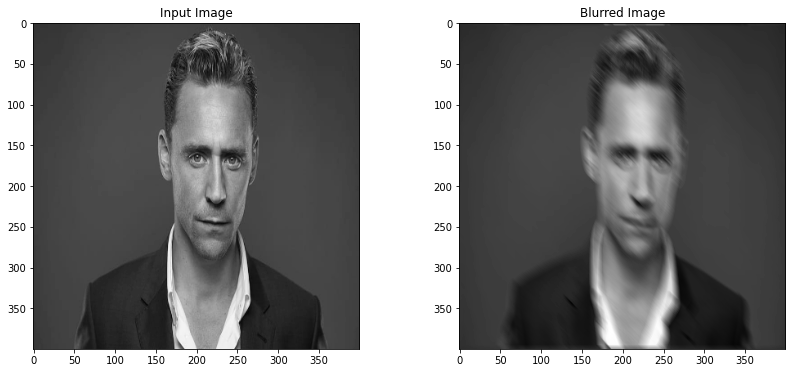

In [7]:
Blurred_IMG = np.multiply(IMG,KERNEL)
B_IMG =np.fft.ifftshift( np.real(np.fft.ifft2(Blurred_IMG)))

figure, axis = plt.subplots(1,2, figsize=(14, 6))
axis[0].imshow(img, "gray")
axis[0].set_title("Input Image")

axis[1].imshow(B_IMG, "gray")

axis[1].set_title("Blurred Image")

plt.show()

#Deconvoluting the blurred image and transforming it back to spatial domain

In [8]:
OUTPUT_IMG = np.divide(Blurred_IMG, KERNEL)
output_img = np.real(np.fft.ifft2(OUTPUT_IMG))


#Comparing output result with input image

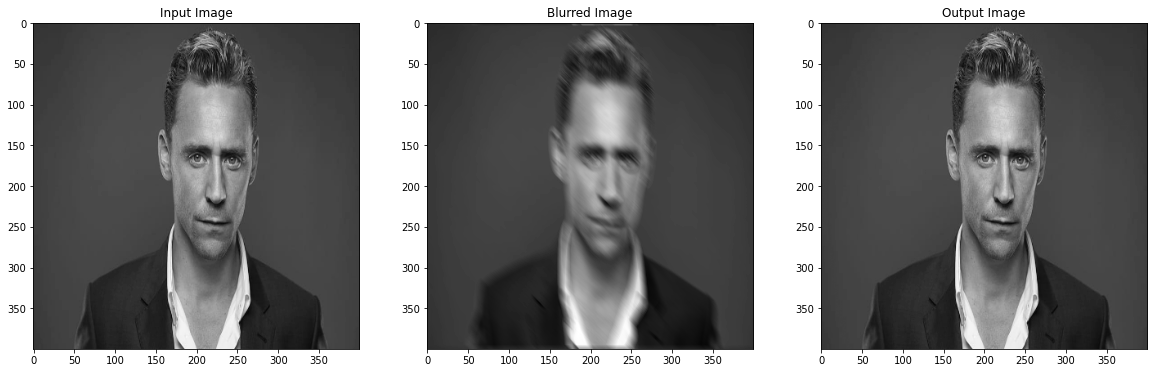

In [9]:
figure, axis = plt.subplots(1,3, figsize=(20, 6))
axis[0].imshow(img, "gray")
axis[0].set_title("Input Image")
axis[1].imshow(B_IMG, "gray")

axis[1].set_title("Blurred Image")
axis[2].imshow(output_img, "gray")

axis[2].set_title("Output Image")

plt.show()